# 目录

## 1 数据类型修改
- 1.1 将数据设置为对应的类型

## 2 重复样本处理
- 2.1 删除重复样本

## 3 缺失值处理
- 3.1 行缺失处理
- 3.2 列缺失处理
 - 3.2.1 删除缺失率超过40%的列
 - 3.2.2 统一填充缺失率少于1%的列
      - 连续型用中位数
      - 分类型用众数
 - 3.2.3 相关性高的连续型变量业务填充
 - 3.2.4 区分度高的分类型变量业务填充
 - 3.2.5 统一填充剩余变量
     - 连续型用0
     - 分类型用None
     
## 4 连续型变量奇异值处理
- 4.1 重点变量处理
- 4.2 统一处理

## 5 校验处理后是否丢失信息

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

# 数据读取

In [2]:
train = pd.read_csv("data/train.csv")
evaluate = pd.read_csv("data/test.csv")

# 1 数据类型修改

In [3]:
clear_dtypes = train.drop('SalePrice', axis=1).dtypes

## 1.1 将数据设置为对应的类型

In [4]:
train['GarageQual'].value_counts()
train.dtypes['GarageQual']

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

dtype('O')

In [5]:
# @@处理@@
# 有序型变量转换
train = train.replace({    "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                           "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                             "ALQ" : 5, "GLQ" : 6},
                           "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                             "ALQ" : 5, "GLQ" : 6},
                           "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                           "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                           "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                           "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5,
                                           "Min2" : 6, "Min1" : 7, "Typ" : 8},
                           "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                           "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                           "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                           "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                           "Street" : {"Grvl" : 1, "Pave" : 2},
                           "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                         )

In [6]:
# MSSubClass： 出售中的房屋类型 应该是分类型
train['MSSubClass'].dtypes

# 房子的出售年月
train['YrSold'].dtypes
train['MoSold'].dtypes

dtype('int64')

dtype('int64')

dtype('int64')

In [7]:
# @@处理@@
# MSSubClass： 出售中的房屋类型 应该是分类型
train['MSSubClass'] = train['MSSubClass'].astype(str)

# 年月
train['YearBuilt'] = train['YearBuilt'].astype(str)
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

# 2 重复样本处理
## 2.1 删除重复样本

In [8]:
# 查看重复样本个数
train.duplicated().sum()

0

In [9]:
# @@处理@@
# 删除重复样本
train.drop_duplicates(inplace=True)

# 3 缺失值处理     

## 3.1 行缺失处理

In [11]:
# 输出缺失率>40%的行数
(train.isnull().sum(axis = 1) / train.shape[1] > 0.4).sum() # axis = 1 列方向---沿行求和；shape返回一个元组shape[1]取第二个也就是列元素的数量

0

In [12]:
# 删除40%的数据都缺失的行
nans_del_indexs = train.index[(train.isnull().sum(axis=1)/train.shape[1] > 0.4)]
train.drop(labels=nans_del_indexs, axis=0, inplace=True)

## 3.2 列缺失处理

In [13]:
# 类别性变量区分度计算
def anova(train_cate_y, categorical, y):
    anv = pd.DataFrame(index=categorical)
    anv['feature'] = categorical
    pvals = []
    for c in categorical:
        samples = []
        for cls in train_cate_y[c].dropna().unique():
            s = train_cate_y[train_cate_y[c] == cls][y].values
            samples.append(s)  # 某特征下不同取值对应的房价组合形成二维列表
        pval = stats.f_oneway(*samples)[1]  # 一元方差分析得到 F，P，要的是 P，P越小，对方差的影响越大。
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

categorical = [column for column in train.columns if train.dtypes[column] == 'object'] # 类型变量集合
y = 'SalePrice'
corr_cate = anova(train, categorical, y)
corr_cate['disparity'] = np.log(20*1./corr_cate['pval'].values)/np.log(20)  # 区分度

In [27]:
train['MSZoning']

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1460, dtype: object

In [28]:
# 统计每个列缺失值比例
NAs = pd.concat([(100 * train.isnull().sum(axis = 0) / train.shape[0]),
                 100 * evaluate.isnull().sum() / evaluate.shape[0]],
                 axis = 1, keys = ['Train', 'evaluate'])
NAs['type'] = train.dtypes[NAs.index]

# 加入连续性变量相关度
numeric_cols = train.select_dtypes(include = ['int64', 'float64']).columns
NAs['corr_couti_y'] = train[numeric_cols].corr()['SalePrice']

# 加入类别性变量区分度
NAs['corr_cate_y'] = corr_cate['disparity']

# 只保留有缺失值的列
NAs = NAs[NAs[['Train', 'evaluate']].sum(axis = 1) > 0].sort_values(by = 'Train', ascending = False)
NAs

,Train,evaluate,type,corr_couti_y,corr_cate_y
PoolQC,99.520548,99.794380,float64,0.447936,NaN
MiscFeature,96.301370,96.504455,object,NaN,1.753202
Alley,93.767123,92.666210,object,NaN,6.618486
Fence,80.753425,80.123372,object,NaN,3.026003
MasVnrType,59.726027,61.274846,object,NaN,10.758944
FireplaceQu,47.260274,50.034270,float64,0.295794,NaN
LotFrontage,17.739726,15.558602,float64,0.351799,NaN
GarageType,5.547945,5.209047,object,NaN,51.655312
GarageYrBlt,5.547945,5.346127,float64,0.486362,NaN
GarageFinish,5.547945,5.346127,object,NaN,72.421212


### 3.2.1 删除缺失率超过40%的列

In [29]:
# 缺失值超过40%的列直接删除
clear_nans_del_cols = NAs.index[((NAs[['Train', 'evaluate']]>40).sum(axis=1)>0).values]

In [30]:
clear_nans_del_cols

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'], dtype='object')

In [31]:
# @@处理@@
train.drop(labels=clear_nans_del_cols, axis=1, inplace=True)

### 3.2.2 统一填充缺失率少于1%的列
      - 连续型用中位数
      - 分类型用众数

In [33]:
clear_nans_less1_cols = NAs.index[((NAs[['Train', 'evaluate']] < 1).sum(axis = 1) == 2).values] # 训练集和测试集中两个都小于1%的列
clear_nans_less1_cols_num = train[clear_nans_less1_cols].select_dtypes(include=[np.number]).columns
clear_nans_less1_cols_class = train[clear_nans_less1_cols].select_dtypes(include=object).columns

In [34]:
clear_nans_less1_cols

Index(['Electrical', 'GarageArea', 'GarageCars', 'MSZoning', 'Functional',
       'KitchenQual', 'BsmtHalfBath', 'BsmtFullBath', 'TotalBsmtSF',
       'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'Exterior2nd', 'Exterior1st',
       'Utilities', 'SaleType'],
      dtype='object')

In [35]:
clear_nans_less1_cols_num_median = train[clear_nans_less1_cols_num].median()
clear_nans_less1_cols_class_mode = train[clear_nans_less1_cols_class].mode()

In [36]:
# @@处理@@
#  - 连续型用中位数
#   - 分类型用众数
train[clear_nans_less1_cols_num] = train[clear_nans_less1_cols_num].fillna(clear_nans_less1_cols_num_median)
train[clear_nans_less1_cols_class] = train[clear_nans_less1_cols_class].fillna(clear_nans_less1_cols_class_mode)

### 3.2.3 相关性高的连续型变量业务填充


In [37]:
# @@处理@@
# GarageYrBlt 车库建成日期 GarageYrBlt	0.055479	0.053425	float64	0.486362
# 车库相关的五个变量GarageType、GarageYrBlt、GarageFinish、GarageQual、GarageCond是由于房子没有车库而缺失。
# GarageYrBlt为车库的年份，我们用房子的建造年份来替代
train.loc[train['GarageYrBlt'].isnull(), 'GarageYrBlt'] = train.loc[train['GarageYrBlt'].isnull(), 'YearBuilt']

# MasVnrArea 外墙装饰材料的面积，Na即认为面积为0 MasVnrArea	0.005479	0.010274	float64	0.477493
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)

# LotFrontage 房子同街道之间的距离，Na即认为距离为0 LotFrontage	0.177397	0.155479	float64	0.351799
train['LotFrontage'] = train['LotFrontage'].fillna(0)

### 3.2.4 区分度高的分类型变量业务填充

In [38]:
clear_KitchenQual_mode = train['KitchenQual'].mode()

In [39]:
# @@处理@@
# BsmtQual 地下室质量  BsmtQual	0.025342	0.030137	object	NaN	143.208288
# BsmtExposure、BsmtFinType2、BsmtQual、BsmtCond、BsmtFinType1五个变量是关于地下室的，都是由于房子没有地下室而缺失。
train['BsmtQual'].fillna('None', inplace=True)

# KitchenQual: String,  // 厨房质量, 这里用众数替换
train['KitchenQual'].fillna(clear_KitchenQual_mode, inplace=True)

### 3.2.5 统一填充剩余变量
     - 连续型用0
     - 分类型用None

In [40]:
# 查看剩余变量情况
remain_col = train.columns[train.isnull().sum(axis=0)>0]
NAs.loc[remain_col, ]

,Train,evaluate,type,corr_couti_y,corr_cate_y
BsmtCond,2.534247,3.084304,float64,0.160658,NaN
BsmtExposure,2.602740,3.015764,float64,0.352958,NaN
BsmtFinType1,2.534247,2.878684,float64,0.277436,NaN
BsmtFinType2,2.602740,2.878684,float64,-0.040139,NaN
Electrical,0.068493,0.000000,object,NaN,14.665360
GarageType,5.547945,5.209047,object,NaN,51.655312
GarageFinish,5.547945,5.346127,object,NaN,72.421212
GarageQual,5.547945,5.346127,float64,0.156693,NaN
GarageCond,5.547945,5.346127,float64,0.125013,NaN


In [42]:
# @@处理@@
clear_nans_remain_cols_num = train[remain_col].select_dtypes(include=[np.number]).columns
clear_nans_remain_cols_class = train[remain_col].select_dtypes(include=object).columns

train[clear_nans_remain_cols_num] = train[clear_nans_remain_cols_num].fillna(0)
train[clear_nans_remain_cols_class] = train[clear_nans_remain_cols_class].fillna('None')

In [43]:
# 查看缺失值是否处理完毕
train.isnull().sum(axis=0).sum()

0

# 4 连续型变量奇异值处理

<Axes: >

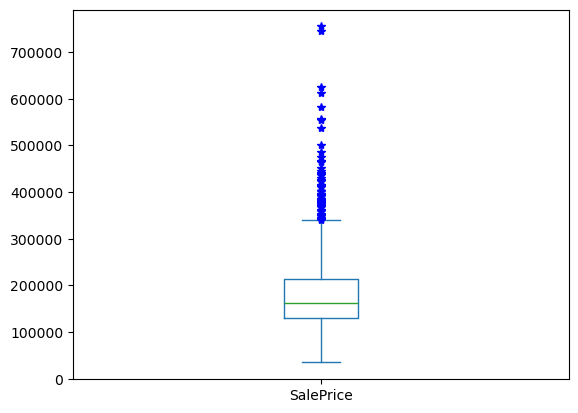

In [44]:
# y变量箱线图
train.SalePrice.plot(kind='box',sym='b*')

In [45]:
# 查看与y变量 高相关性的变量的箱线图
train_number = train.select_dtypes(include = [np.number]).drop(['Id'], axis=1)

In [48]:
numeric_cols = train.select_dtypes(include = ['int64', 'float64']).columns
corr = train[numeric_cols].corr()
corr_threshvalue = 0.5 #number of variables for heatmap
corr_cols = corr.loc[:, corr.loc['SalePrice', :].abs() > corr_threshvalue].columns

OverallQual        Axes(0.125,0.11;0.0545775x0.77)
YearRemodAdd    Axes(0.190493,0.11;0.0545775x0.77)
ExterQual       Axes(0.255986,0.11;0.0545775x0.77)
TotalBsmtSF     Axes(0.321479,0.11;0.0545775x0.77)
1stFlrSF        Axes(0.386972,0.11;0.0545775x0.77)
GrLivArea       Axes(0.452465,0.11;0.0545775x0.77)
FullBath        Axes(0.517958,0.11;0.0545775x0.77)
KitchenQual     Axes(0.583451,0.11;0.0545775x0.77)
TotRmsAbvGrd    Axes(0.648944,0.11;0.0545775x0.77)
GarageCars      Axes(0.714437,0.11;0.0545775x0.77)
GarageArea       Axes(0.77993,0.11;0.0545775x0.77)
SalePrice       Axes(0.845423,0.11;0.0545775x0.77)
dtype: object

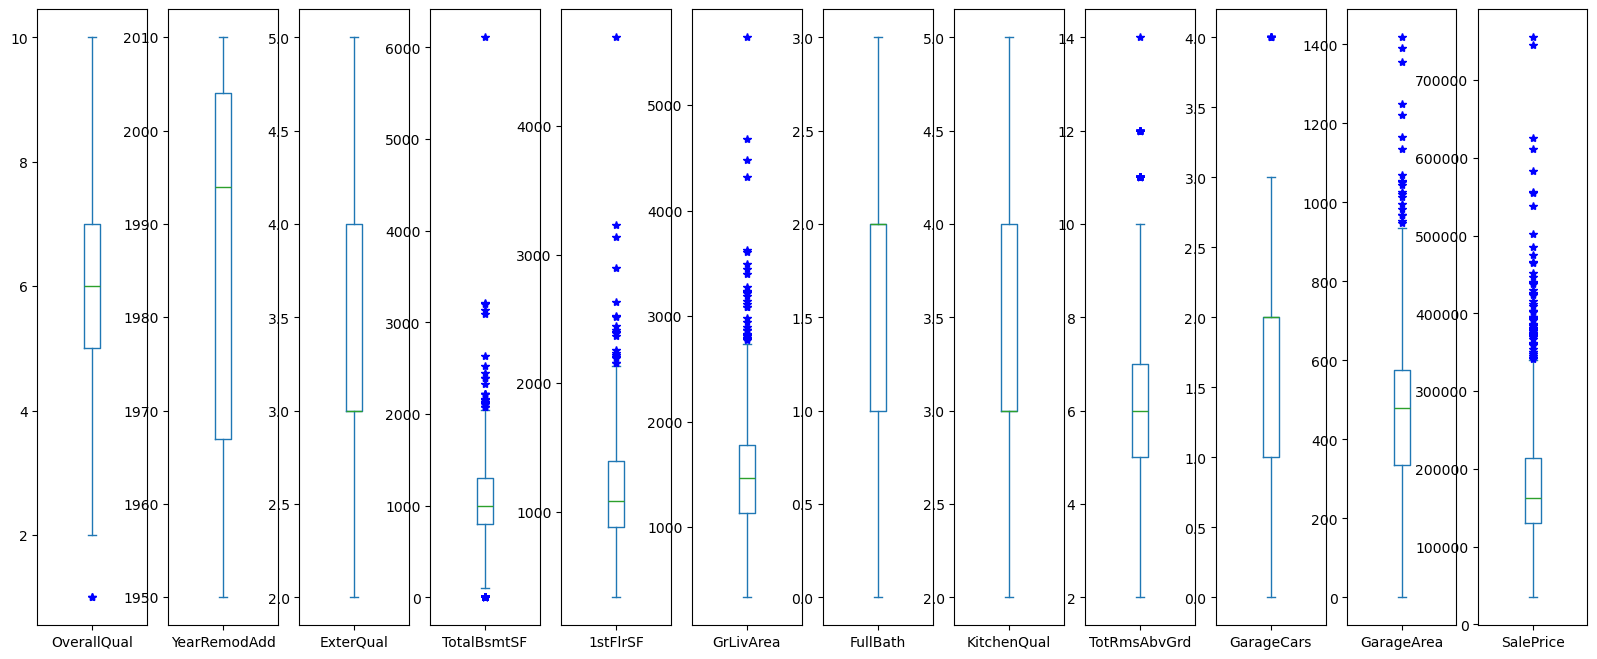

In [49]:
train_number[corr_cols].plot(sym='b*', kind='box', subplots=True, figsize=(20, 8))

In [51]:
# 找到异常值上下临界点
clear_number_q = train_number.quantile(q=[0, 0.05, 0.25, 0.5, 0.75, 0.95, 1], axis=0)
clear_number_q

,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0.00,0.0,1300.00,1.0,1.0,2.0,1.0,1.0,1.0,1950.0,0.00,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,34900.0
0.05,0.0,3311.70,2.0,3.0,4.0,2.0,4.0,4.0,1950.0,0.00,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,88000.0
0.25,42.0,7553.50,2.0,3.0,4.0,3.0,5.0,5.0,1967.0,0.00,...,3.0,2.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,129975.0
0.50,63.0,9478.50,2.0,4.0,4.0,3.0,6.0,5.0,1994.0,0.00,...,3.0,2.0,0.0,25.00,0.00,0.0,0.0,0.0,0.0,163000.0
0.75,79.0,11601.50,2.0,4.0,4.0,3.0,7.0,6.0,2004.0,164.25,...,3.0,2.0,168.0,68.00,0.00,0.0,0.0,0.0,0.0,214000.0
0.95,104.0,17401.15,2.0,4.0,4.0,3.0,8.0,8.0,2007.0,456.00,...,3.0,2.0,335.0,175.05,180.15,0.0,160.0,0.0,0.0,326100.0
1.00,313.0,215245.00,2.0,4.0,4.0,3.0,10.0,9.0,2010.0,1600.00,...,5.0,2.0,857.0,547.00,552.00,508.0,480.0,738.0,15500.0,755000.0


In [52]:
# outlier_expand为异常值定义伸缩参数，标准为1.5
lower_outlier_expand = 1.5
upper_outlier_expand = 3
clear_number_q.loc['lower_outlier',:] = clear_number_q.loc[0.25, :] - (clear_number_q.loc[0.75, :] - clear_number_q.loc[0.25, :])*lower_outlier_expand
clear_number_q.loc['upper_outlier',:] = clear_number_q.loc[0.75, :] + (clear_number_q.loc[0.75, :] - clear_number_q.loc[0.25, :])*upper_outlier_expand

In [53]:
# 统计各个列中高于上临界点的数量
uppper_cnt = (train_number > clear_number_q.loc['upper_outlier', :]).sum()
uppper_cnt

LotFrontage        2
LotArea           34
Street             0
LotShape           0
Utilities          0
LandSlope          0
OverallQual        0
OverallCond        0
YearRemodAdd       0
MasVnrArea        28
ExterQual          0
ExterCond        149
BsmtCond          65
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         1
BsmtFinType2     166
BsmtFinSF2       167
BsmtUnfSF          0
TotalBsmtSF        5
HeatingQC          0
1stFlrSF           3
2ndFlrSF           0
LowQualFinSF      26
GrLivArea          4
BsmtFullBath       0
BsmtHalfBath      82
FullBath           0
HalfBath           0
BedroomAbvGr       1
KitchenAbvGr      67
KitchenQual        0
TotRmsAbvGrd       1
Functional         0
Fireplaces         0
GarageCars         0
GarageArea         3
GarageQual        17
GarageCond        11
PavedDrive         0
WoodDeckSF         3
OpenPorchSF       18
EnclosedPorch    208
3SsnPorch         24
ScreenPorch      116
PoolArea           7
MiscVal           52
SalePrice    

In [54]:
# 统计各个列中低于下临界点的数量
lower_cnt = (train_number < clear_number_q.loc['lower_outlier', :]).sum()
lower_cnt

LotFrontage        0
LotArea            2
Street             6
LotShape          10
Utilities          1
LandSlope         78
OverallQual        2
OverallCond       31
YearRemodAdd       0
MasVnrArea         0
ExterQual          0
ExterCond         29
BsmtCond          84
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF       37
HeatingQC          0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       6
KitchenAbvGr       1
KitchenQual        0
TotRmsAbvGrd       0
Functional       100
Fireplaces         0
GarageCars         0
GarageArea         0
GarageQual       132
GarageCond       123
PavedDrive       120
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
SalePrice    

In [55]:
# 汇总各个列的奇异值数量
pd.DataFrame({'uppper_cnt': uppper_cnt, 
              'lower_cnt': lower_cnt, 
              'all': uppper_cnt+lower_cnt,  
              'all_rate': 100*(uppper_cnt+lower_cnt)/train.shape[0],
              'corr': corr.loc['SalePrice',:]
             }).sort_values(by='corr', ascending=False)

,uppper_cnt,lower_cnt,all,all_rate,corr
SalePrice,12.0,0.0,12.0,0.821918,1.000000
OverallQual,0.0,2.0,2.0,0.136986,0.790982
GrLivArea,4.0,0.0,4.0,0.273973,0.708624
ExterQual,0.0,0.0,0.0,0.000000,0.682639
KitchenQual,0.0,0.0,0.0,0.000000,0.659600
GarageCars,0.0,0.0,0.0,0.000000,0.640409
GarageArea,3.0,0.0,3.0,0.205479,0.623431
TotalBsmtSF,5.0,37.0,42.0,2.876712,0.613581
1stFlrSF,3.0,0.0,3.0,0.205479,0.605852
FullBath,0.0,0.0,0.0,0.000000,0.560664


## 4.1 y变量处理

In [57]:
# train.ix[train['SalePrice'] > clear_number_q.loc['upper_outlier', 'SalePrice'], 'SalePrice'] = clear_number_q.loc['upper_outlier', 'SalePrice']
# train.ix[train['SalePrice'] < clear_number_q.loc['lower_outlier', 'SalePrice'], 'SalePrice'] = clear_number_q.loc['lower_outlier', 'SalePrice']
train.loc[train['SalePrice'] > clear_number_q.loc['upper_outlier', 'SalePrice'], 'SalePrice'] = clear_number_q.loc['upper_outlier', 'SalePrice']
train.loc[train['SalePrice'] < clear_number_q.loc['lower_outlier', 'SalePrice'], 'SalePrice'] = clear_number_q.loc['lower_outlier', 'SalePrice']

## 4.2 重点变量处理

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

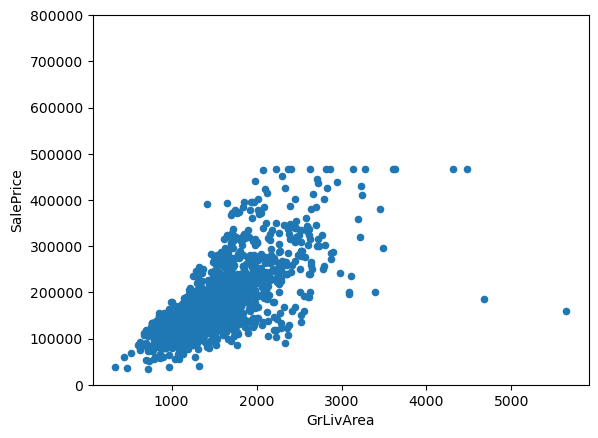

In [58]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

In [59]:
#deleting points
train.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,2,1,Bnk,4,Corner,...,0,0,0,480,0,1,2008,New,Partial,160000.0
523,524,60,RL,130.0,40094,2,3,Bnk,4,Inside,...,0,0,0,0,0,10,2007,New,Partial,184750.0


In [60]:
train = train.drop(train[train['Id'] == 1299].index)
train = train.drop(train[train['Id'] == 524].index)

## 4.3 其余变量统一处理

In [69]:
clear_number_para = train_number.drop('SalePrice', axis=1).columns
clear_number_q_para = clear_number_q.drop('SalePrice', axis = 1)

In [71]:
clear_number_q_para.columns
clear_number_para

Index(['LotFrontage', 'LotArea', 'Street', 'LotShape', 'Utilities',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

Index(['LotFrontage', 'LotArea', 'Street', 'LotShape', 'Utilities',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [72]:
# @@处理@@
# where(oklist, notokvalue) 满足条件保留原值，不满足则替换为指定值
train[clear_number_para] = train[clear_number_para].where(train[clear_number_para] < clear_number_q_para.loc['upper_outlier', :],
                                                          clear_number_q_para.loc['upper_outlier', :], axis = 1)
train[clear_number_para] = train[clear_number_para].where(train[clear_number_para] > clear_number_q_para.loc['lower_outlier', :],
                                                          clear_number_q_para.loc['lower_outlier', :], axis = 1)

OverallQual        Axes(0.125,0.11;0.0545775x0.77)
YearRemodAdd    Axes(0.190493,0.11;0.0545775x0.77)
ExterQual       Axes(0.255986,0.11;0.0545775x0.77)
TotalBsmtSF     Axes(0.321479,0.11;0.0545775x0.77)
1stFlrSF        Axes(0.386972,0.11;0.0545775x0.77)
GrLivArea       Axes(0.452465,0.11;0.0545775x0.77)
FullBath        Axes(0.517958,0.11;0.0545775x0.77)
KitchenQual     Axes(0.583451,0.11;0.0545775x0.77)
TotRmsAbvGrd    Axes(0.648944,0.11;0.0545775x0.77)
GarageCars      Axes(0.714437,0.11;0.0545775x0.77)
GarageArea       Axes(0.77993,0.11;0.0545775x0.77)
SalePrice       Axes(0.845423,0.11;0.0545775x0.77)
dtype: object

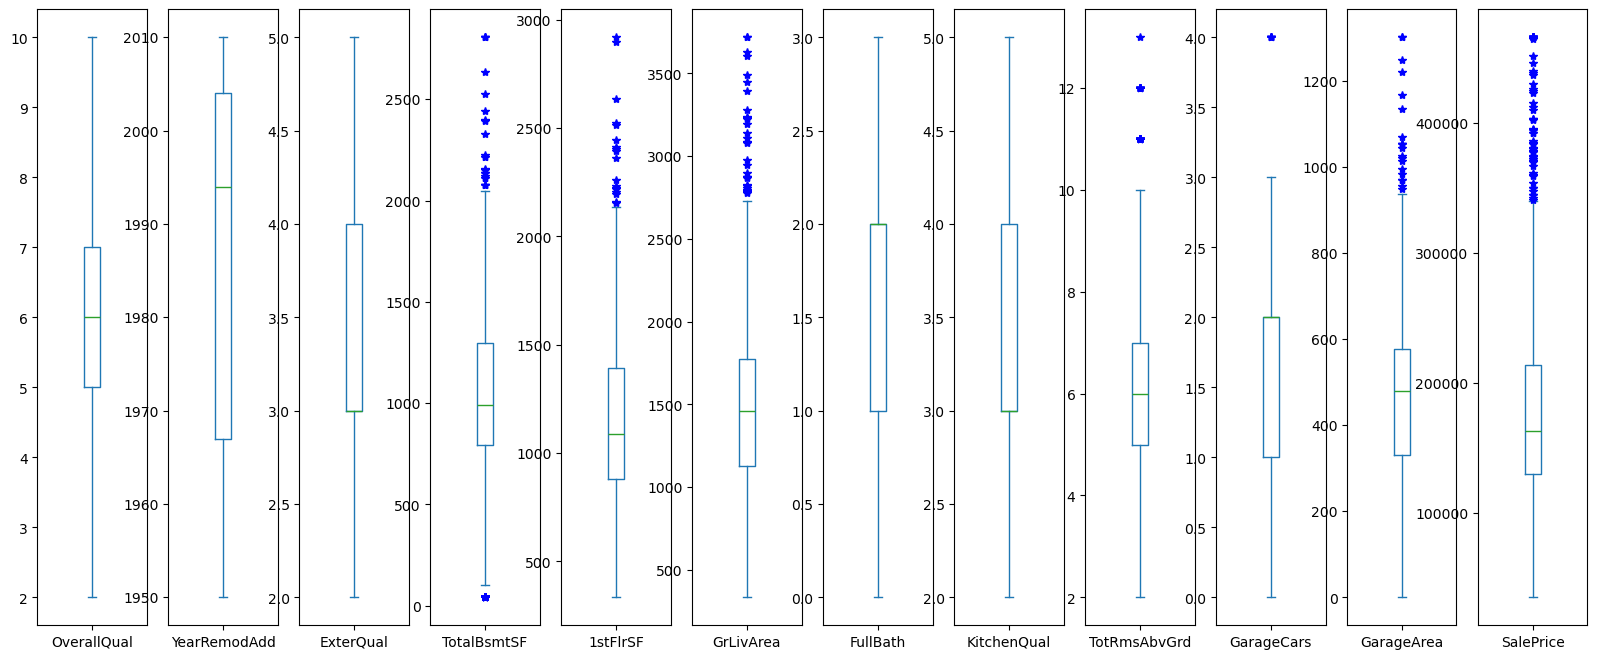

In [73]:
train[corr_cols].plot(sym='b*', kind='box', subplots=True, figsize=(20, 8))

# 5 校验处理是否丢失信息

================================================== 核心统计特征对比 ==================================================
               mean_original  mean_clean  mean_change(%)  50%_original  \
BsmtFullBath            0.41        0.42            2.40           0.0   
WoodDeckSF             92.61       93.88            1.37           0.0   
Fireplaces              0.60        0.61            1.19           1.0   
OverallCond             5.56        5.59            0.55           5.0   
BsmtFinSF1            438.40      438.83            0.10         374.0   
BedroomAbvGr            2.86        2.87            0.09           3.0   
HalfBath                0.38        0.38            0.06           0.0   
YearRemodAdd         1985.68     1984.83           -0.04        1995.0   
TotRmsAbvGrd            6.58        6.51           -1.00           6.0   
FullBath                1.58        1.56           -1.07           2.0   
1stFlrSF             1173.58     1158.64           -1.27        1097.0   
G

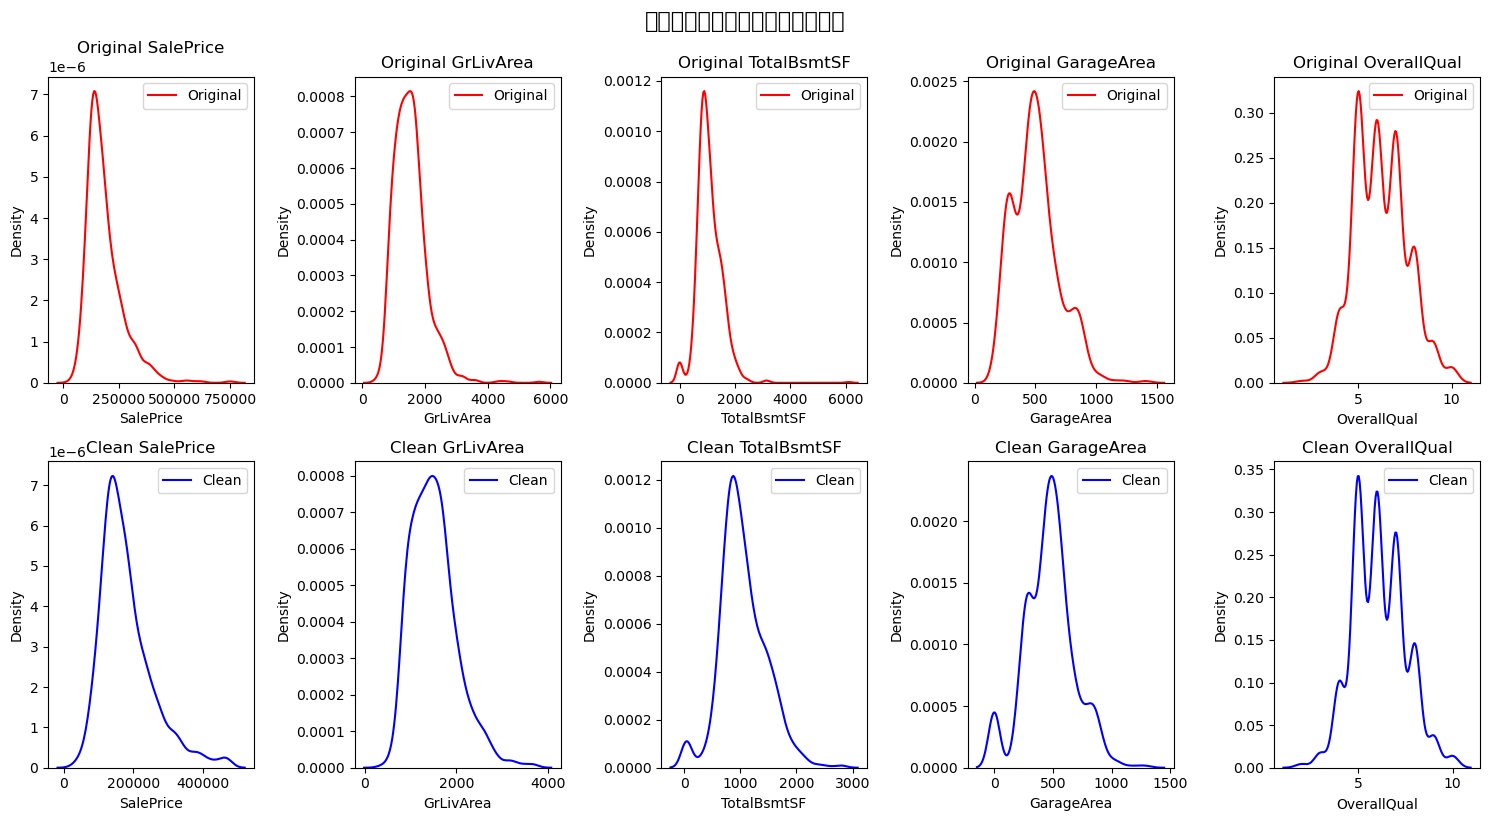

================================================== 核心变量相关性对比 ==================================================


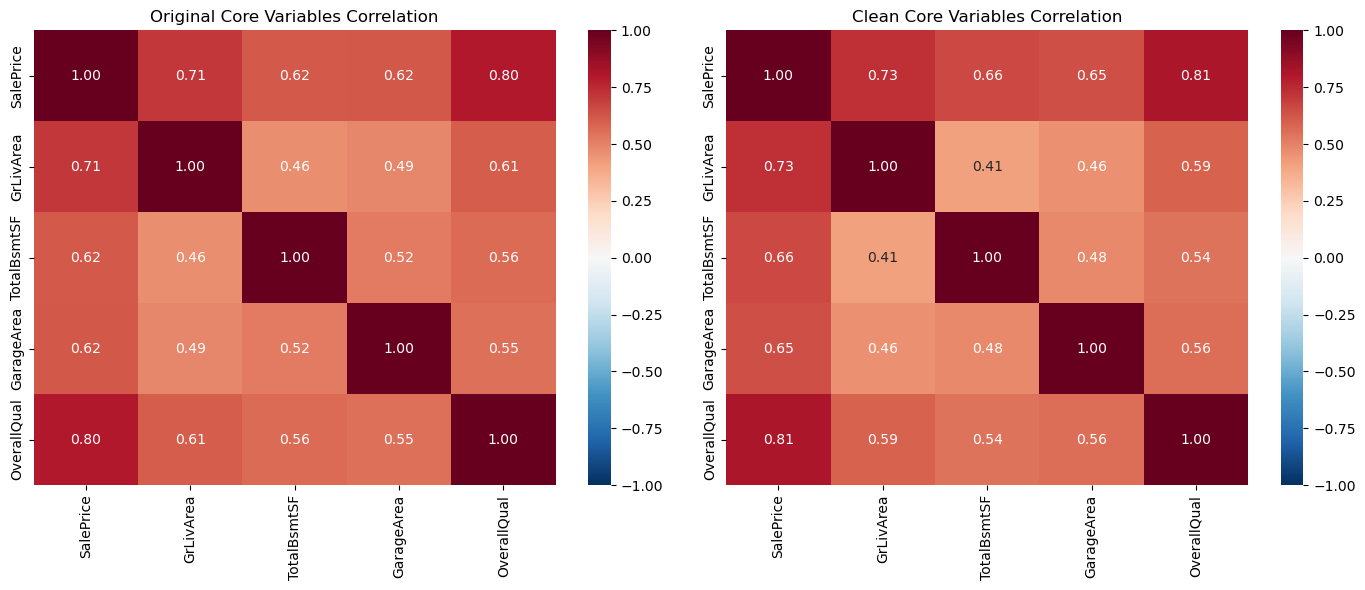

             original_corr  clean_corr  corr_diff
GrLivArea            0.705       0.730      0.025
TotalBsmtSF          0.616       0.657      0.042
GarageArea           0.619       0.647      0.028
OverallQual          0.798       0.813      0.015

================================================== 样本量与缺失值校验 ==================================================
原始数据样本量（剔除Id缺失）：1121
清洗后数据样本量：1458
清洗后样本保留率：130.06%
清洗后数据总缺失值数：0
仍存在缺失值的列：无

================================================== 校验结论 ==================================================
❌ 数据清洗校验未通过，请根据以上结果回检并修正清洗步骤！
→ 问题：核心统计特征变化幅度过大


In [75]:
def check_clean_info_loss(train_original, train_clean, clear_number_q, core_vars=None):
    # 初始化核心变量
    if core_vars is None:
        core_vars = ['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'OverallQual']
    # 筛选数值型变量
    num_cols = train_original.select_dtypes(include=[np.number]).drop(['Id'], axis=1).columns
    train_original_num = train_original[num_cols].dropna()
    train_clean_num = train_clean[num_cols]
    
    # 1. 核心统计特征对比
    print("="*50 + " 核心统计特征对比 " + "="*50)
    desc_original = train_original_num.describe().T
    desc_clean = train_clean_num.describe().T
    compare_desc = pd.merge(desc_original, desc_clean, left_index=True, right_index=True, suffixes=('_original', '_clean'))
    compare_desc['mean_change(%)'] = (compare_desc['mean_clean'] - compare_desc['mean_original']) / compare_desc['mean_original'].replace(0, np.nan) * 100
    compare_desc['median_change(%)'] = (compare_desc['50%_clean'] - compare_desc['50%_original']) / compare_desc['50%_original'].replace(0, np.nan) * 100
    compare_desc['std_change(%)'] = (compare_desc['std_clean'] - compare_desc['std_original']) / compare_desc['std_original'].replace(0, np.nan) * 100
    print(compare_desc[['mean_original', 'mean_clean', 'mean_change(%)', '50%_original', '50%_clean', 'median_change(%)']].round(2).sort_values('mean_change(%)', ascending=False))
    
    # 2. 分布可视化对比
    print("\n" + "="*50 + " 核心变量分布对比 " + "="*50)
    plt.figure(figsize=(15, 8))
    for i, var in enumerate(core_vars):
        plt.subplot(2, len(core_vars), i+1)
        sns.kdeplot(train_original_num[var], color='red', label='Original')
        plt.title(f'Original {var}')
        plt.legend()
        plt.tight_layout()
        plt.subplot(2, len(core_vars), i+1+len(core_vars))
        sns.kdeplot(train_clean_num[var], color='blue', label='Clean')
        plt.title(f'Clean {var}')
        plt.legend()
        plt.tight_layout()
    plt.suptitle('核心变量清洗前后核密度分布对比', fontsize=16, y=1.02)
    plt.show()
    
    # 3. 相关性对比
    print("="*50 + " 核心变量相关性对比 " + "="*50)
    corr_original = train_original_num[core_vars].corr()
    corr_clean = train_clean_num[core_vars].corr()
    plt.figure(figsize=(14, 6))
    plt.subplot(1,2,1)
    sns.heatmap(corr_original, annot=True, cmap='RdBu_r', vmin=-1, vmax=1, fmt='.2f')
    plt.title('Original Core Variables Correlation')
    plt.subplot(1,2,2)
    sns.heatmap(corr_clean, annot=True, cmap='RdBu_r', vmin=-1, vmax=1, fmt='.2f')
    plt.title('Clean Core Variables Correlation')
    plt.tight_layout()
    plt.show()
    # 相关性差值
    corr_sale_original = corr_original['SalePrice'].drop('SalePrice')
    corr_sale_clean = corr_clean['SalePrice'].drop('SalePrice')
    corr_compare = pd.DataFrame({'original_corr': corr_sale_original, 'clean_corr': corr_sale_clean, 'corr_diff': abs(corr_sale_clean - corr_sale_original)})
    print(corr_compare.round(3))
    
    # 4. 样本量与缺失值校验
    print("\n" + "="*50 + " 样本量与缺失值校验 " + "="*50)
    print(f"原始数据样本量（剔除Id缺失）：{len(train_original_num)}")
    print(f"清洗后数据样本量：{len(train_clean_num)}")
    print(f"清洗后样本保留率：{len(train_clean_num)/len(train_original_num)*100:.2f}%")
    print(f"清洗后数据总缺失值数：{train_clean.isnull().sum().sum()}")
    print(f"仍存在缺失值的列：{train_clean.columns[train_clean.isnull().sum() > 0].tolist() if len(train_clean.columns[train_clean.isnull().sum() > 0]) > 0 else '无'}")
    
    # 5. 判定结论
    print("\n" + "="*50 + " 校验结论 " + "="*50)
    mean_change_ok = (abs(compare_desc['mean_change(%)'].dropna()) < 5).all()
    corr_diff_ok = (corr_compare['corr_diff'] < 0.05).all()
    sample_keep_ok = (len(train_clean_num)/len(train_original_num) > 0.95)
    no_missing_ok = (train_clean.isnull().sum().sum() == 0)
    if mean_change_ok and corr_diff_ok and sample_keep_ok and no_missing_ok:
        print("✅ 数据清洗校验通过，未丢失有效信息，可用于后续建模！")
    else:
        print("❌ 数据清洗校验未通过，请根据以上结果回检并修正清洗步骤！")
        if not mean_change_ok: print("→ 问题：核心统计特征变化幅度过大")
        if not corr_diff_ok: print("→ 问题：关键变量相关性变化过大")
        if not sample_keep_ok: print("→ 问题：样本保留率过低")
        if not no_missing_ok: print("→ 问题：仍存在残留缺失值")

# 调用函数执行校验
train_original = pd.read_csv("data/train.csv")
check_clean_info_loss(train_original, train, clear_number_q, core_vars=['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'OverallQual'])

勉强可以接受的结果，有些数据异常值删的多，而且有些数据过于极端对均值的影响也比较大，分布和热力图体现出来的变化不大，基本符合数据的整体特征，适合训练一个普适性较好的模型